## Milestone 2 - EDA

In [1]:
# Use the PRS dataset to create a dataframe

import pandas as pd
import numpy as np

df = pd.read_csv('Final.csv')

In [11]:
# import the visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
# Create a Histogram on DISTRIBUTION_CHANNEL

# Count the number of 'Total DISTRIBUTION_CHANNEL Amount'  for each DISTRIBUTION_CHANNEL.
channel_counts = df["DISTRIBUTION_CHANNEL"].value_counts()
channel_counts

Korea            8755
Congo            8740
Iraq             4574
Australia        4551
Iceland          4540
                 ... 
Chad             4238
Vietnam          4236
Estonia          4223
Taiwan           4213
Faroe Islands    4212
Name: DISTRIBUTION_CHANNEL, Length: 243, dtype: int64

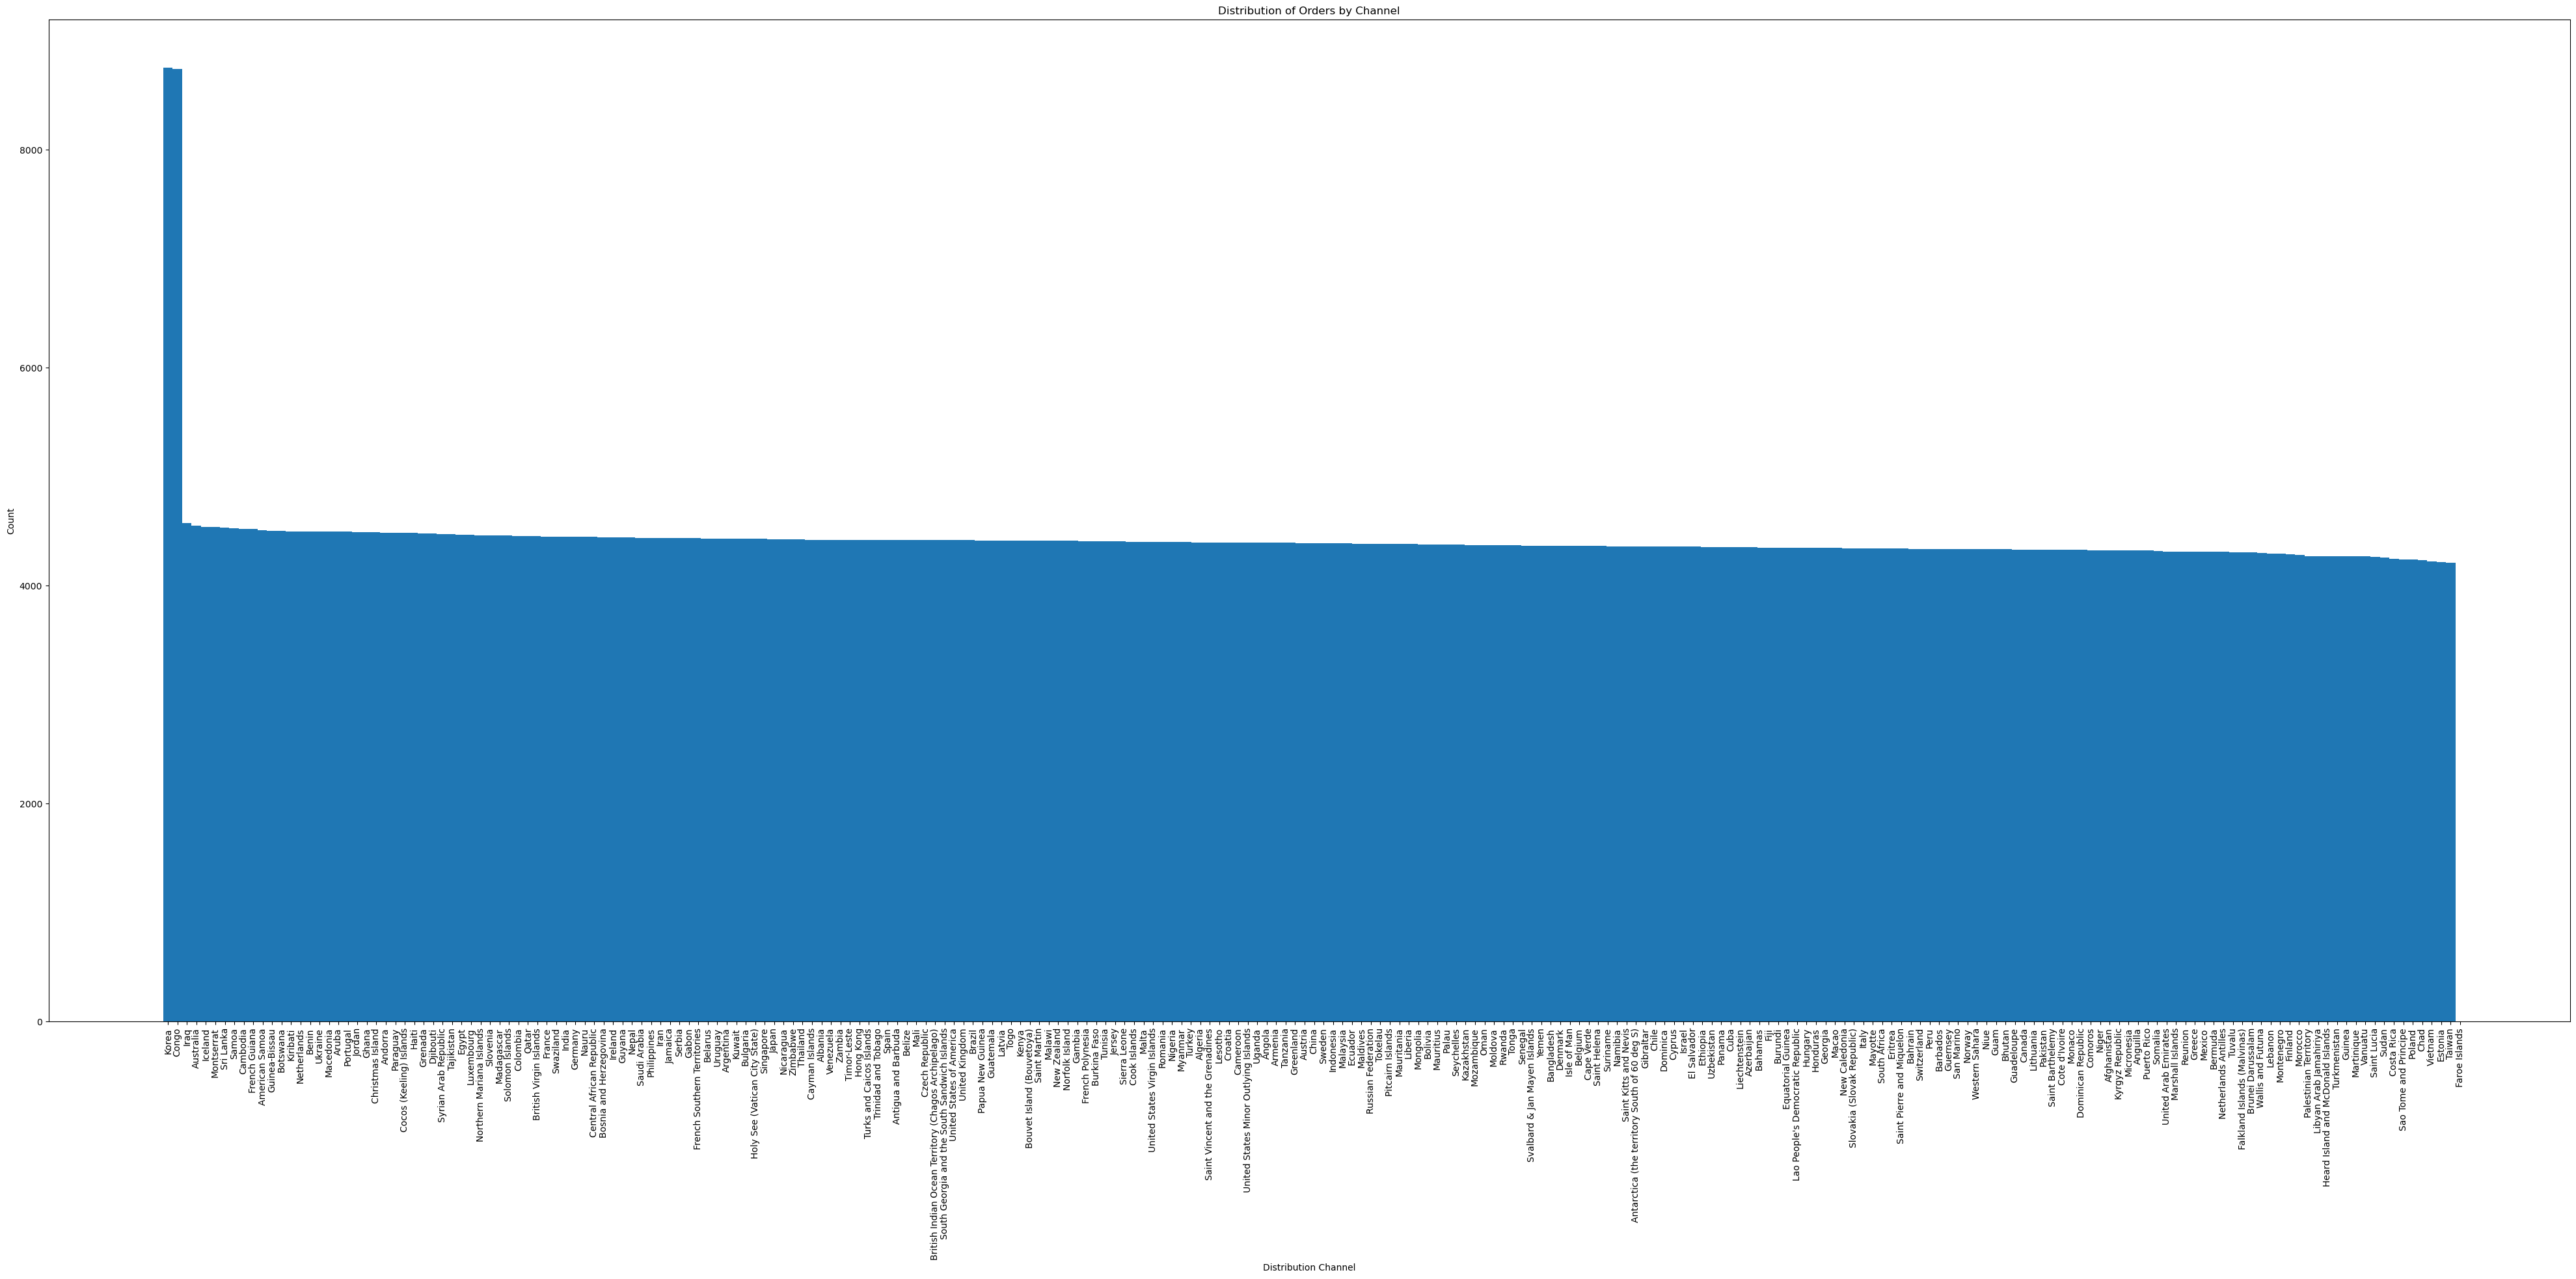

In [13]:
plt.figure(figsize=(50, 20))
channel_counts = df['DISTRIBUTION_CHANNEL'].value_counts()
plt.hist(channel_counts.index, bins=len(channel_counts), weights=channel_counts.values, align='left')
plt.xlabel('Distribution Channel')
plt.ylabel('Count')
plt.title('Distribution of Orders by Channel')
plt.xticks(rotation=90)
plt.show()

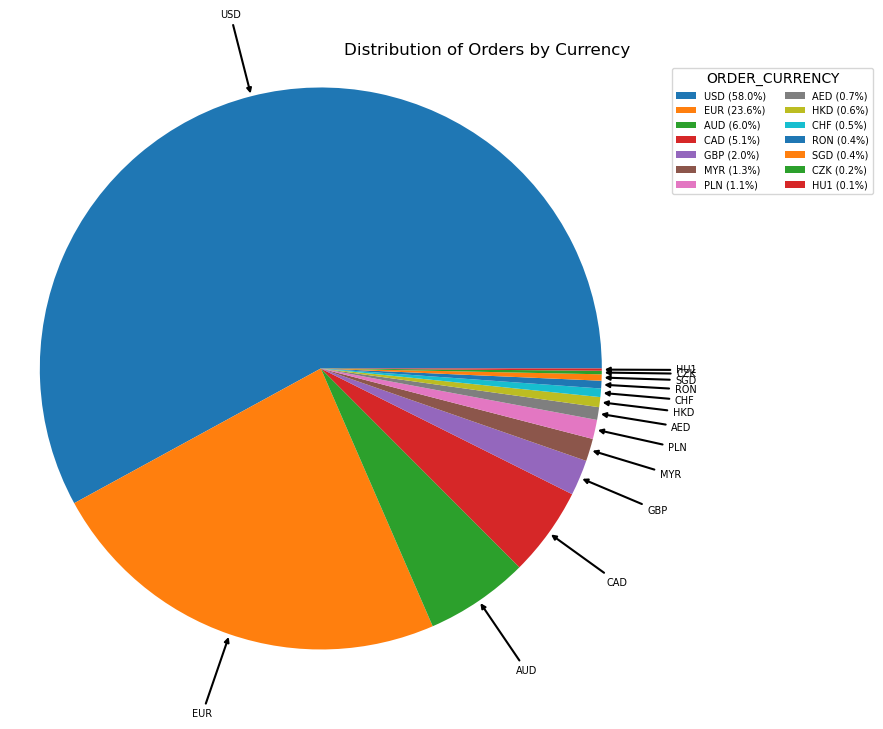

In [14]:
# Create a Pie Chart on ORDER_CURRENCY

currency_counts = df['ORDER_CURRENCY'].value_counts()
currency_counts_filtered = currency_counts[currency_counts > 1000]

plt.figure(figsize=(8, 8))
wedges, labels, autopct = plt.pie(currency_counts_filtered, autopct='', labels=None)

legend_labels = [f'{label} ({percentage:.1f}%)' for label, percentage in zip(currency_counts_filtered.index, currency_counts_filtered.values / currency_counts_filtered.sum() * 100)]
plt.legend(wedges, legend_labels, title='ORDER_CURRENCY', loc='upper right', bbox_to_anchor=(1.4,1), fontsize=7, ncol=2)

arrowprops = dict(arrowstyle='-|>', lw=1.5, ls='-', color='black')
for i, (label, wedge) in enumerate(zip(labels, wedges)):
    theta = (wedge.theta2 - wedge.theta1) / 2.0 + wedge.theta1
    theta = np.deg2rad(theta)

    x = np.cos(theta)
    y = np.sin(theta)

    plt.annotate(currency_counts_filtered.index[i], xy=(x, y), xytext=(1.3*x, 1.3*y),
                 arrowprops=arrowprops, ha='center', va='center', fontsize=7)

plt.title('Distribution of Orders by Currency', loc='right')
plt.axis('equal')
plt.show()

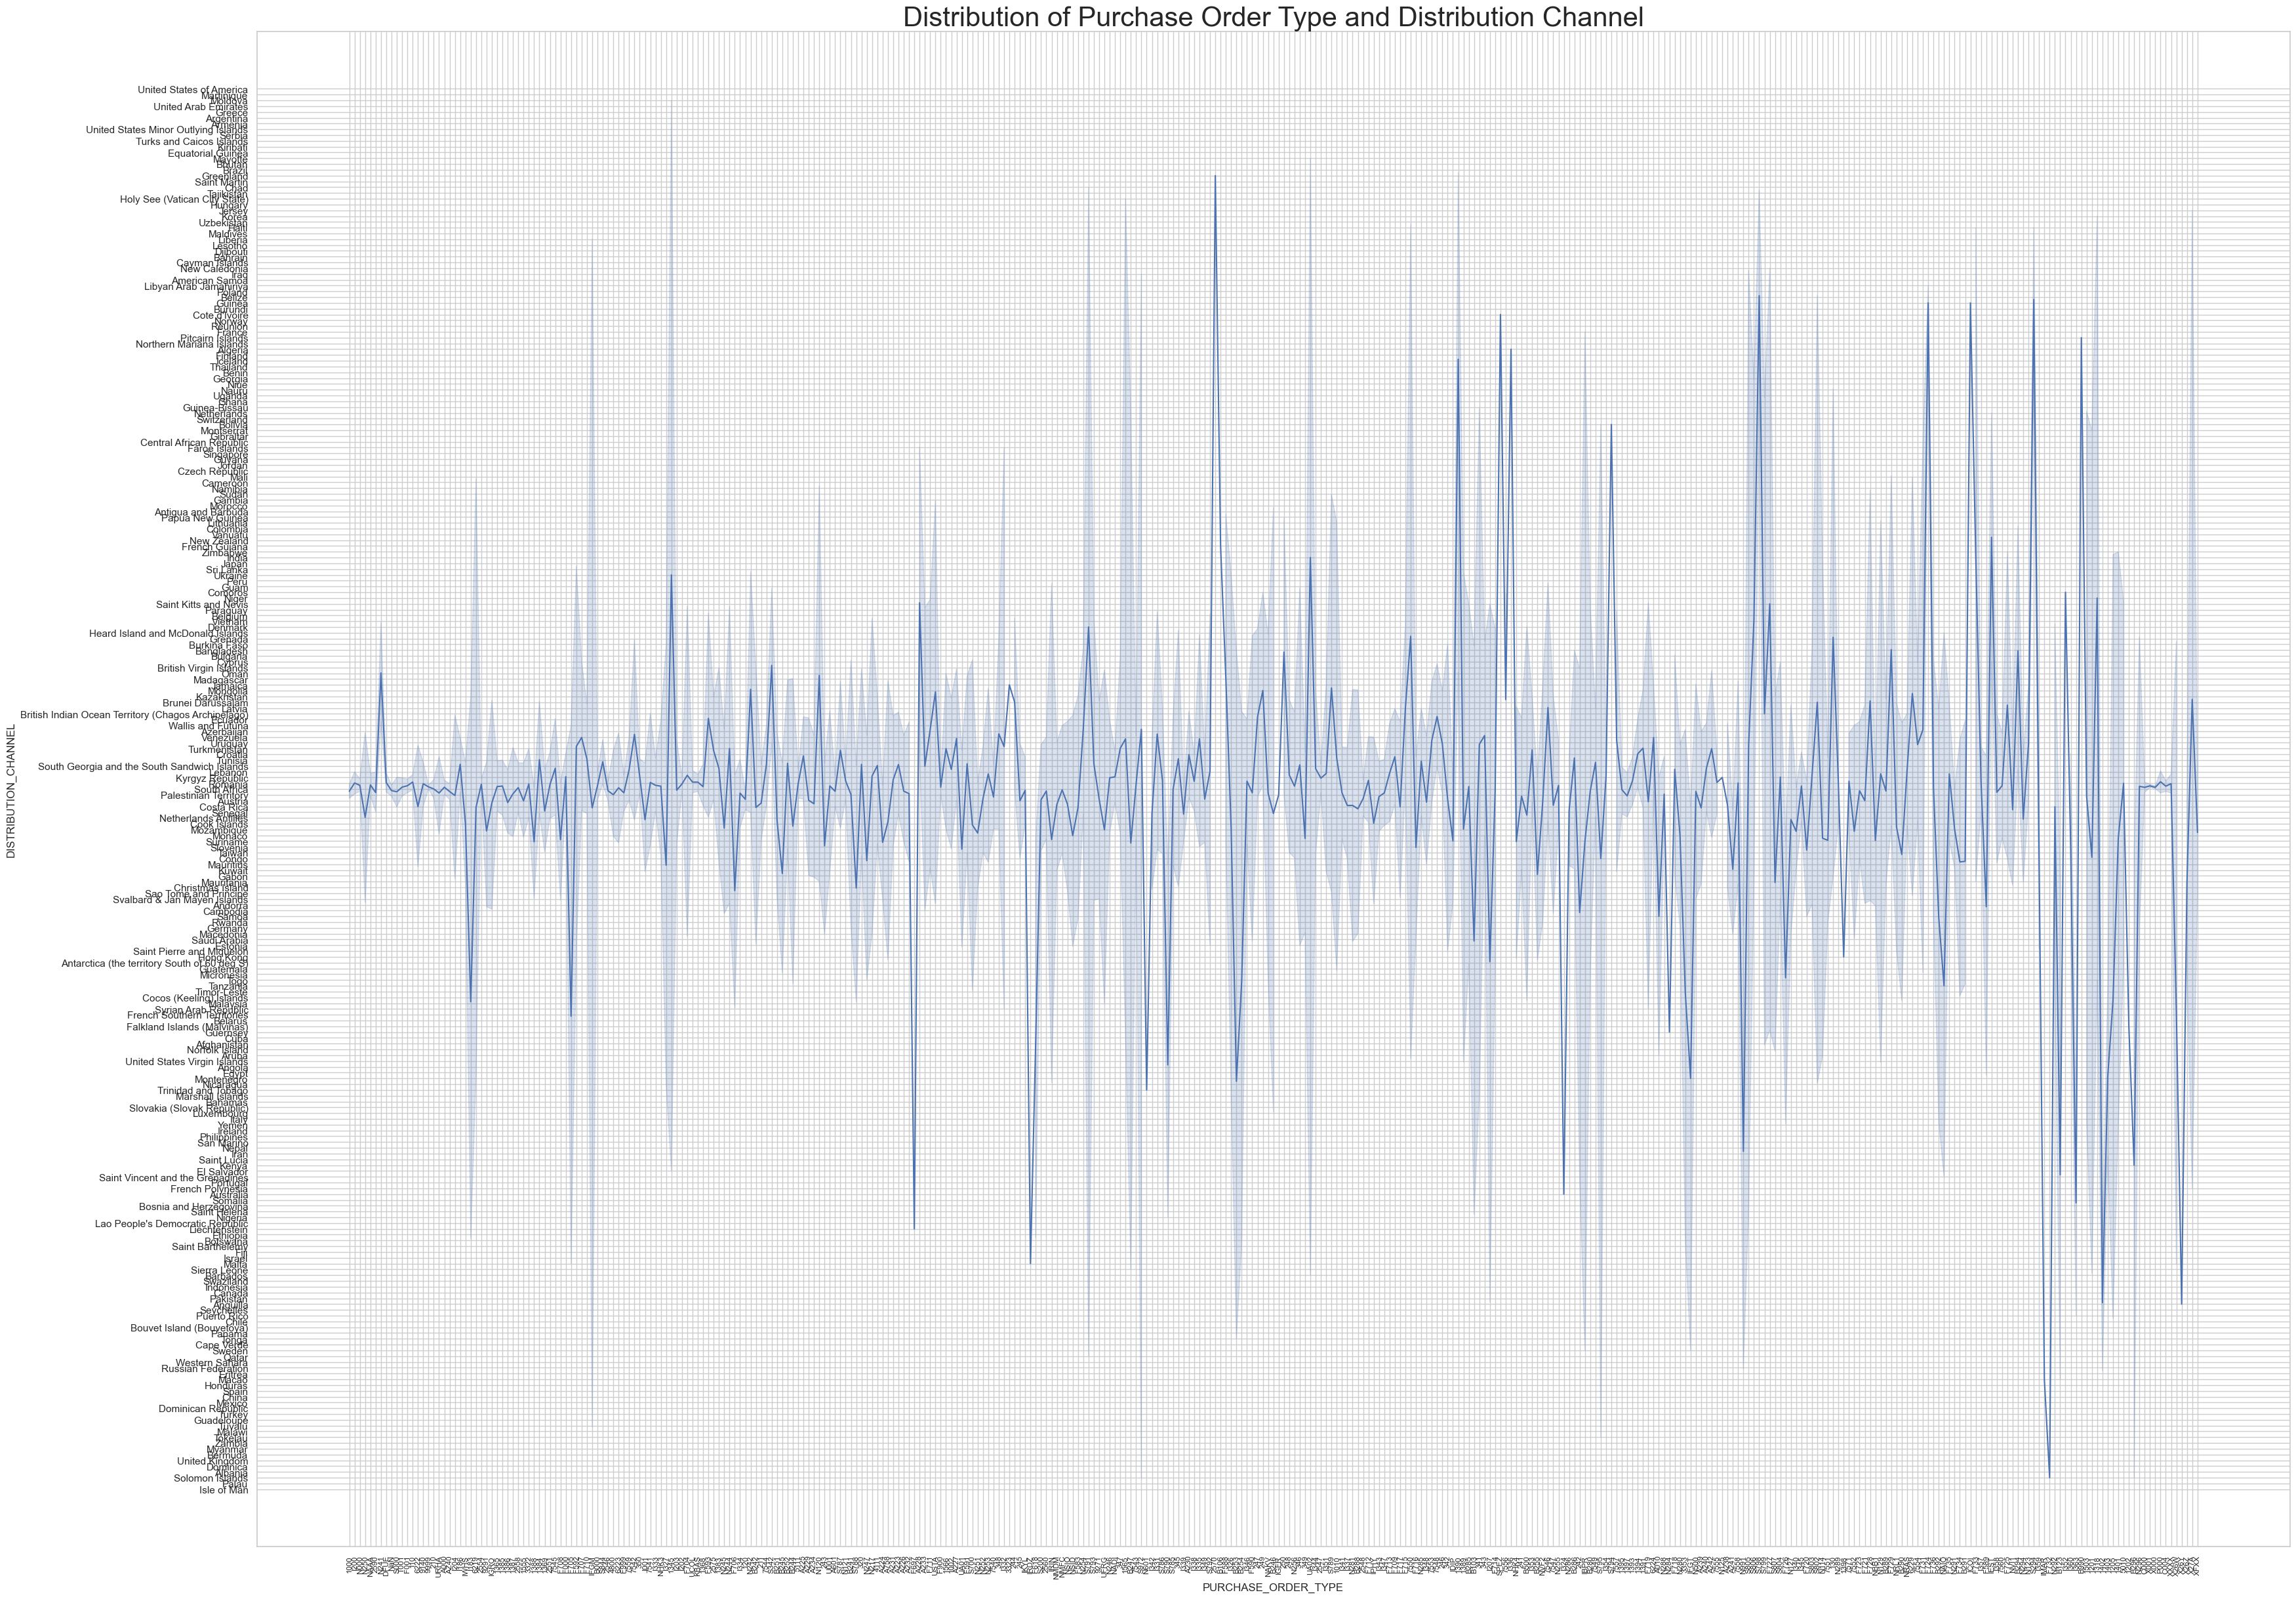

In [15]:
# Create a line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

sns.set(style="whitegrid")
plt.figure(figsize=(40, 30))
colors = ['red', 'green', 'blue', 'orange', 'purple']
sns.lineplot(data=df, x="PURCHASE_ORDER_TYPE", y="DISTRIBUTION_CHANNEL", palette=colors)
plt.xticks(rotation=90, fontsize='x-small')
plt.title("Distribution of Purchase Order Type and Distribution Channel", fontsize=30)
plt.show()

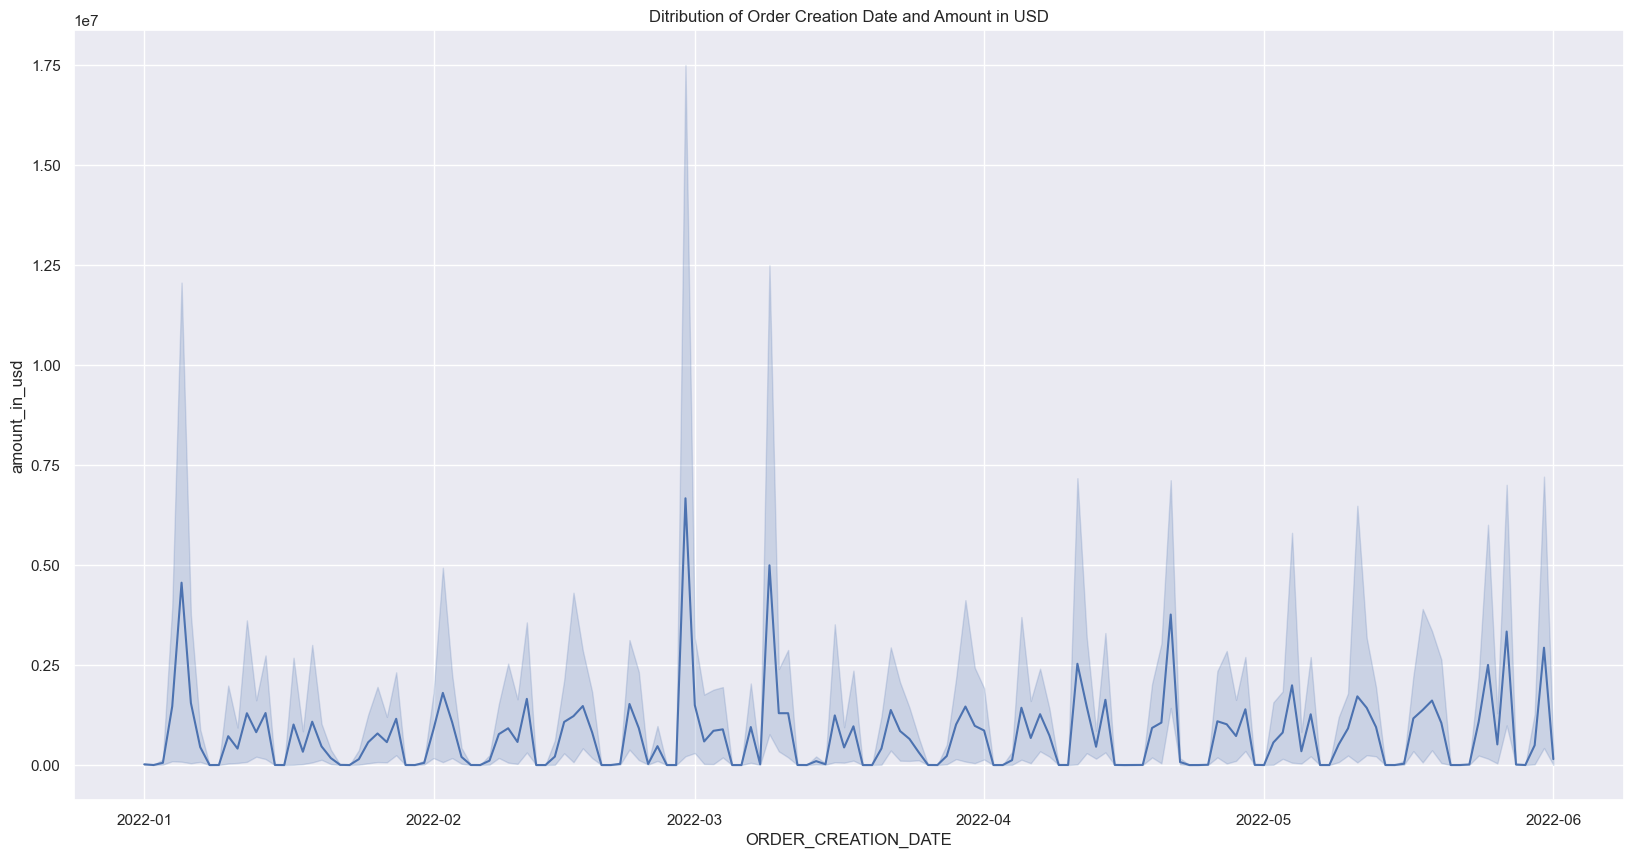

In [16]:
# Create a line plot on ORDER_CREATION_DATE and amount_in_usd

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.lineplot(data=df,x="ORDER_CREATION_DATE",y="amount_in_usd")
plt.title("Ditribution of Order Creation Date and Amount in USD")
plt.show()

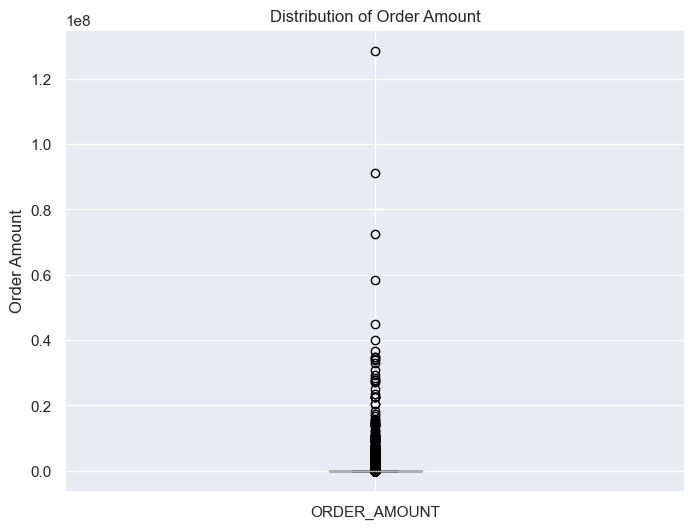

In [17]:
# Create a boxplot on ORDER_AMOUNT to find out the outliers

plt.figure(figsize=(8, 6))
df.boxplot(column='ORDER_AMOUNT')
plt.ylabel('Order Amount')
plt.title('Distribution of Order Amount')
plt.show()

In [18]:
# Create a barchart on COMPANY_CODE and ORDER_AMOUNT

# Count the number of 'Total Order Amount'  for each COMPANY_CODE.
order_amount_counts = df.groupby('COMPANY_CODE')['ORDER_AMOUNT'].size().reset_index(name='amount')
order_amount_counts.columns = ['COMPANY_CODE', 'Total Order Amount']
order_amount_counts

,COMPANY_CODE,Total Order Amount
0,59,4928
1,108,826
2,135,2275
3,136,1647
4,150,6583
5,271,7852
6,3000,64262
7,3030,6198
8,3050,13946
9,3100,28344


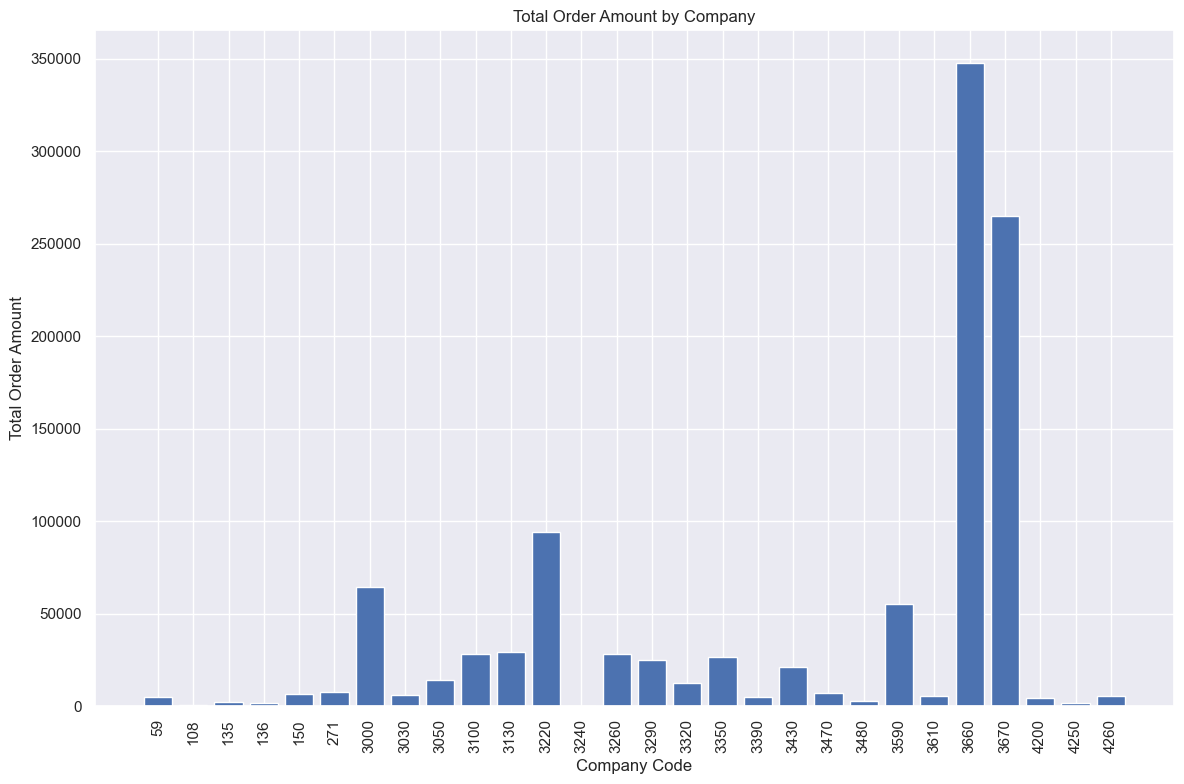

In [19]:
x = np.arange(len(order_amount_counts))
y = order_amount_counts['Total Order Amount']

plt.figure(figsize=(12, 8))
plt.bar(x, y)
plt.xlabel('Company Code')
plt.ylabel('Total Order Amount')
plt.title('Total Order Amount by Company')
plt.xticks(x, order_amount_counts['COMPANY_CODE'], rotation=90)
plt.tight_layout()
plt.show()